## how often to genes in clusters share funciton?

inspired by https://www.nature.com/articles/s41467-021-25129-x, "The molecular basis, genetic control and pleiotropic effects of local gene co-expression", espeically figure 3 and go term enrishment analysis and https://www.nature.com/articles/s42003-022-03831-w "Shared regulation and functional relevance of local gene co-expression revealed by single cell analysis" go term enrichment analysis

* distance in groups vs not
* paralog frequency
* bidirecitonal promotors?
* shared enhancers
* shared go term
* same pathway
* same complex 
* inverted/total ctcf motifs between
* hi-c contacts

I want to make some plots here, and also add all of these annotations to the cluster file. At a later point, perhaps automate the annotation of the clusters file with this information

In [24]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm  # for notebooks
tqdm.pandas()

import seaborn as sns
import matplotlib.pyplot as plt


# get outputs from a config file
prefix = '/home/klawren/oak/pcqtls'
import yaml
config_path= f'{prefix}/config/new_clusters/proteincoding_rewrite.yaml'
with open(config_path, 'r') as f:
    config = yaml.safe_load(f)

tissue_id_path = config['tissue_id_path']
clusters_dir = config['clusters_dir']
expression_dir = config['expression_dir']

# load in the tissue ids 
tissue_df = pd.read_csv(f"{prefix}/{tissue_id_path}", header=0)
tissue_ids = list(tissue_df['Tissue'])
tissue_id = 'Lung'

protien_coding_only = True

## Cluster distances
pairs on genes in clusters vs random pairs
and for larger groups vs other random larger groups

In [25]:
# load in cluster data
cluster_df = pd.read_csv(f'{prefix}/{clusters_dir}/{tissue_id}_clusters_all_chr.csv', index_col=0)

In [26]:
# load in expression data (so we only compare to pairs of genes also expressed in this tissue)
# load in gene expression data
expression_df = pd.read_csv(f'{prefix}/{expression_dir}/{tissue_id}.v8.normalized_expression.bed', sep='\t')
expression_df

,#chr,start,end,gene_id,GTEX-111CU,GTEX-111FC,GTEX-111VG,GTEX-111YS,GTEX-1122O,GTEX-1128S,...,GTEX-ZVZQ,GTEX-ZXG5,GTEX-ZY6K,GTEX-ZYFG,GTEX-ZYT6,GTEX-ZYVF,GTEX-ZYW4,GTEX-ZYY3,GTEX-ZZPT,GTEX-ZZPU
0,chr1,923927,923928,ENSG00000187634.11,-0.849957,0.250339,1.299424,-1.866185,-1.193795,-0.674490,...,-0.161000,1.449182,1.091180,0.775601,-0.235329,-0.220372,1.641107,-0.967422,-1.118003,-0.662342
1,chr1,959308,959309,ENSG00000188976.10,2.523240,-1.224058,-1.346025,-0.378006,0.367591,0.562694,...,-1.477525,-0.551348,1.477525,-0.048597,-0.802125,0.310982,-0.107076,0.836096,-0.959694,0.265405
2,chr1,960586,960587,ENSG00000187961.13,-0.393706,0.205464,-0.230338,-0.885348,-0.170851,0.568394,...,-0.029151,-0.280531,0.822394,0.215398,0.506646,0.579850,-0.540072,-0.626468,1.641107,-0.441412
3,chr1,966496,966497,ENSG00000187583.10,1.244873,-1.622711,-0.200505,-1.765264,-0.863984,0.420092,...,-0.788794,-1.006961,1.554123,0.462935,-0.235329,-0.156081,-0.346879,0.200505,-0.048597,-0.367591
4,chr1,982092,982093,ENSG00000187642.9,1.894644,-0.352043,0.346879,-1.956659,-0.210428,-0.775601,...,-0.388462,0.528865,1.056592,-0.295723,-0.802125,-0.116853,-0.730448,0.523286,0.540072,-0.043734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16760,chrX,155334656,155334657,ENSG00000155962.12,0.863984,-1.073725,1.031459,0.843007,0.321196,1.213847,...,0.473777,0.808844,-0.730448,-0.014574,-0.769055,0.136441,-0.736806,1.224058,-0.151166,-0.341725
16761,chrX,155669943,155669944,ENSG00000185973.10,-0.952023,-0.151166,-0.802125,-0.551348,-0.795442,0.871061,...,0.215398,1.266242,-0.914479,-0.452147,0.479219,0.620568,0.802125,0.000000,0.936847,-0.769055
16762,chrX,155767811,155767812,ENSG00000168939.11,-0.146254,0.479219,-0.043734,0.316085,-0.452147,-0.523286,...,-0.863984,0.473777,0.014574,-0.921884,0.574113,-0.591383,0.736806,-1.244873,1.056592,0.305888
16763,chrX,155881292,155881293,ENSG00000124333.15,1.213847,0.072932,-0.967422,1.894644,0.245329,-0.270440,...,-0.501131,0.352043,-0.250339,0.097309,0.053461,-0.795442,1.065120,0.235329,-1.048141,0.808844


In [27]:
# load in gene data
full_gencode=pd.read_csv('/home/klawren/oak/pcqtls/data/references/processed_gencode.v26.GRCh38.genes.gtf', sep='\t', skiprows=range(6), 
            header=None, names=['chr', 'dataset', 'type', 'start','end', '.', 'strand', 'na', 'info'])

full_gencode = full_gencode[full_gencode['type']=='transcript']
full_gencode['transcript_id'] = full_gencode['info'].str.split(';').str[1].str.split('\"').str[-2]
full_gencode['gene_type'] = full_gencode['info'].str.split(';').str[2].str.split('\"').str[-2]


# add in the start and end info
full_gencode['tss_start'] = np.where(full_gencode['strand'] == '+', full_gencode['start'], full_gencode['end'])
full_gencode['gene_end'] = np.where(full_gencode['strand'] == '-', full_gencode['start'], full_gencode['end'])

# filter to protien coding
if protien_coding_only:
    full_gencode = full_gencode[full_gencode['gene_type'] == 'protein_coding']

gid_gencode = full_gencode.set_index('transcript_id').drop_duplicates()

# subset to ones expressed
expressed_gencode = full_gencode[full_gencode['transcript_id'].isin(expression_df['gene_id'])]

# index based on gene id
expressed_gencode = expressed_gencode.set_index('transcript_id').drop_duplicates().sort_values(['chr', 'start', 'end'])

In [28]:
# add cluster size from gene-gene into cluster df
def get_cluster_size(row):
    transcript_ids = row['Transcripts'].split(',')
    cluster_gencode = gid_gencode.loc[transcript_ids]
    return  cluster_gencode['end'].max() - cluster_gencode['start'].min()

cluster_df['cluster_size'] = cluster_df.progress_apply(get_cluster_size, axis=1)

  0%|          | 0/947 [00:00<?, ?it/s]

In [29]:
# a list of restricted cluster starts
# first for n=2, first and second for n=3, ...
cluster_start_ids = []
for i in range(cluster_df['N_genes'].max()):
    out_ids = cluster_df[cluster_df['N_genes'] == i]['Transcripts'].str.split(',').str[:i-1].values
    if len(out_ids)>0:
        cluster_start_ids.append(np.concatenate(out_ids))
    else:
        cluster_start_ids.append([])


In [30]:
def get_null_cluster_sizes(gencode_df, num_genes, cluster_start_ids):
    # sort
    gencode_df = gencode_df.sort_values(['chr', 'start', 'end'])
    # on a per chorm basis
    size_output = []
    for chr_id in range (1,23,1):
        chr_subset_gencode = gencode_df[gencode_df['chr'] == f'chr{chr_id}']
        chr_sizes = chr_subset_gencode['end'].shift(-(num_genes-1)) - chr_subset_gencode['start']
        chr_sizes = chr_sizes.iloc[:-(num_genes-1)]
        # select only those not in this cluster
        chr_sizes = chr_sizes[~pd.Series(chr_sizes.index.values).isin(cluster_start_ids[num_genes:]).values]
        size_output.append(chr_sizes.values)
    return np.concatenate(size_output)

In [31]:
# get background distances for clusters
# should only include clusters that aren't pairs
# can do this be removing the first transcript from the output
pair_background = get_null_cluster_sizes(expressed_gencode, 2, cluster_start_ids)
three_background = get_null_cluster_sizes(expressed_gencode, 3, cluster_start_ids)
four_background = get_null_cluster_sizes(expressed_gencode, 4, cluster_start_ids)

# combine into one df
null_df = pd.DataFrame({'data_type':np.concatenate([['2_null']*len(pair_background), 
                                                    ['3_null']*len(three_background), 
                                                    ['4_null']*len(four_background)]), 
               'cluster_size': np.concatenate([pair_background, 
                                               three_background, 
                                               four_background])})

# add a label column to the cluster df 
cluster_df['data_type'] = cluster_df['N_genes'].clip(0,4).astype(str) + '_cluster'

/home/klawren/micromamba/envs/tensorqtl_r/lib/python3.8/site-packages/pandas/core/algorithms.py:531: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return f(comps_array, values)
/home/klawren/micromamba/envs/tensorqtl_r/lib/python3.8/site-packages/pandas/core/algorithms.py:531: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return f(comps_array, values)
/home/klawren/micromamba/envs/tensorqtl_r/lib/python3.8/site-packages/pandas/core/algorithms.py:531: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return f(comps_array, values)


/local/scratch/klawren/slrmtmp.43033283/ipykernel_45634/945775713.py:3: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  sns.kdeplot(pd.concat([cluster_df, null_df]), x='cluster_size', hue='data_type', clip=(0, 10**6),


Text(0.5, 1.0, 'Distribution of gene-gene distance for clusters and genomic background')

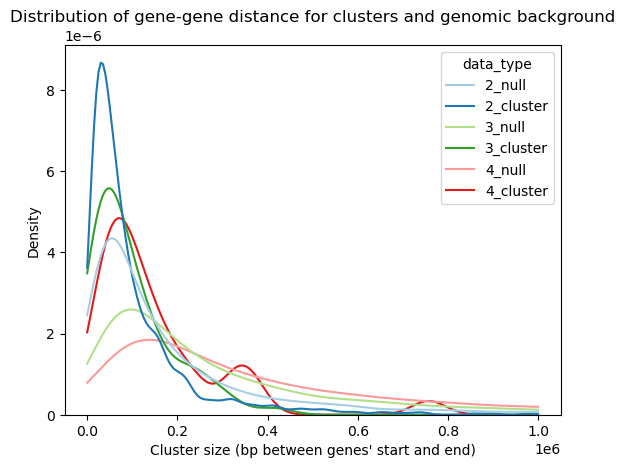

In [32]:
fig, ax = plt.subplots()

sns.kdeplot(pd.concat([cluster_df, null_df]), x='cluster_size', hue='data_type', clip=(0, 10**6), 
            bw_adjust=.5, fill=False, ax=ax, common_norm=False, palette = sns.color_palette("Paired"), 
            hue_order=['2_null','2_cluster','3_null','3_cluster','4_null', '4_cluster'])
plt.xlabel("Cluster size (bp between genes' start and end)")
plt.title('Distribution of gene-gene distance for clusters and genomic background')

## bidirectional promotors
if two of the genes in the cluster are opposite strand with tss < 1000 bp away, classify as bidirecitonal promotor

In [33]:
cluster_df

,N_genes,Transcripts,Perc_cor,Mean_cor,Mean_pos_cor,Mean_neg_cor,Chromosome,Tissue,cluster_size,data_type
0,12,"ENSG00000143520.6,ENSG00000143536.7,ENSG000001...",0.727273,0.333203,0.384647,-0.039763,1,Lung,757449,4_cluster
1,5,"ENSG00000168765.16,ENSG00000213366.12,ENSG0000...",1.000000,0.512728,0.512728,NaN,1,Lung,119347,4_cluster
2,4,"ENSG00000203812.2,ENSG00000272196.2,ENSG000001...",1.000000,0.324948,0.324948,NaN,1,Lung,45176,4_cluster
3,4,"ENSG00000158477.6,ENSG00000158481.12,ENSG00000...",1.000000,0.479731,0.479731,NaN,1,Lung,103416,4_cluster
4,3,"ENSG00000162438.11,ENSG00000142615.7,ENSG00000...",1.000000,0.563754,0.563754,NaN,1,Lung,48998,3_cluster
...,...,...,...,...,...,...,...,...,...,...
20,2,"ENSG00000242247.10,ENSG00000100266.18",1.000000,0.270983,0.270983,NaN,22,Lung,218643,2_cluster
21,2,"ENSG00000100427.15,ENSG00000073146.15",1.000000,0.331970,0.331970,NaN,22,Lung,102299,2_cluster
22,2,"ENSG00000100429.17,ENSG00000188130.13",1.000000,0.308327,0.308327,NaN,22,Lung,16642,2_cluster
23,2,"ENSG00000196576.14,ENSG00000205593.11",1.000000,0.279870,0.279870,NaN,22,Lung,52081,2_cluster


In [35]:
row = cluster_df.iloc[0]

,chr,dataset,type,start,end,.,strand,na,info,gene_type,tss_start,gene_end
transcript_id,,,,,,,,,,,,
ENSG00000143520.6,chr1,HAVANA,transcript,152348735,152360006,.,-,.,"gene_id ""ENSG00000143520.6""; transcript_id ""EN...",protein_coding,152360006,152348735
ENSG00000143536.7,chr1,HAVANA,transcript,152409243,152414263,.,-,.,"gene_id ""ENSG00000143536.7""; transcript_id ""EN...",protein_coding,152414263,152409243
ENSG00000169509.5,chr1,HAVANA,transcript,152514502,152516010,.,+,.,"gene_id ""ENSG00000169509.5""; transcript_id ""EN...",protein_coding,152514502,152516010
ENSG00000198854.5,chr1,HAVANA,transcript,152719522,152720470,.,+,.,"gene_id ""ENSG00000198854.5""; transcript_id ""EN...",protein_coding,152719522,152720470
ENSG00000203786.6,chr1,HAVANA,transcript,152759561,152762052,.,+,.,"gene_id ""ENSG00000203786.6""; transcript_id ""EN...",protein_coding,152759561,152762052
ENSG00000163207.6,chr1,HAVANA,transcript,152908545,152911886,.,+,.,"gene_id ""ENSG00000163207.6""; transcript_id ""EN...",protein_coding,152908545,152911886
ENSG00000169474.4,chr1,HAVANA,transcript,152985231,152985500,.,+,.,"gene_id ""ENSG00000169474.4""; transcript_id ""EN...",protein_coding,152985231,152985500
ENSG00000163209.14,chr1,HAVANA,transcript,153001747,153003856,.,+,.,"gene_id ""ENSG00000163209.14""; transcript_id ""E...",protein_coding,153001747,153003856
ENSG00000169469.8,chr1,HAVANA,transcript,153031202,153032900,.,+,.,"gene_id ""ENSG00000169469.8""; transcript_id ""EN...",protein_coding,153031202,153032900


In [ ]:
# add cluster size from gene-gene into cluster df
def get_(row):
    transcript_ids = row['Transcripts'].split(',')
    cluster_gencode = gid_gencode.loc[transcript_ids]
    # check all pairwise combos of genes
    for idx, first_gene_row in cluster_gencode.iterrows():
        for idx, second_gene_row in cluster_gencode.iterrows():
            if ()